In [ ]:
# Gravitational constant

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import copy

In [ ]:
# Defines out non-linear function

# Old version; too many parameters (t0 not necessary)
def grav_osc_o(t, A, w0, S, tau, phi, t0):
    return A * np.exp(-(t - t0) / tau) * np.sin(w0 * (t - t0) + phi) + S

# Removing phi by ensuring that phi = 0
def grav_osc_p(t, A, w0, S, tau):
    return np.exp(- t / tau) * np.sin(w0 * t)

# Removing as many variables as we can
def grav_osc_op(t, w0, tau):
    return np.exp(- t / tau) * np.sin(w0 * t)

def grav_osc_S(t, S, w0, tau, A):
    return A * np.exp(- t / tau) * np.sin(w0 * t) + S


def grav_osc(t, A, w0, S, tau, phi):
    return A * np.exp(- t / tau) * np.sin(w0 * t + phi) + S

# Defines our plotting function
def plot_gc(tv, yv, file, name = '', save = False):
    
    t = tv[file]
    y = yv[file]
    
    if len(name) == 0:
        name = file
    
    fig, ax = plt.subplots()
    ax.set_title(name)
    
    ax.plot(t, y, marker = "o", markersize = 3, linestyle = "None", c = "#ff7f0f")
    
    if file == "3e_1-1" or file == "3e_1":
        plt.axhline(y = 0.185 * 100, c = "k", linestyle = "--", linewidth = 1, label = "Equilibrium position")

    #plt.axhline(y = 23, c = "k", linestyle = "--", linewidth = 0.5, label = "Phototransistor 23")
    
    # Shows the legend
    ax.legend()
    
    # Adds axis titles
    plt.ylabel("phototransistor number (unitless)")
    plt.xlabel("time (min)")
    
    if not save:
        plt.show()
    else:
        plt.savefig(name + '.png', bbox_inches='tight')
    
# These functions are to make our uncertainty calculations human-quicker
def ada(dS, b, M, d, L):
    return dS * b ** 2 / 4 / M / d / L

def lam(d, r):
    return d ** 2 + 2 / 5 * r ** 2

def eps(w, tau):
    return w ** 2 + 1 / tau

In [16]:
# Processes data
files = ["1", "2_1", "2_2", "2_3", "3_1", "3e_1"]

transform = True

# Chooses which files to process
#ftp = files[:1] + files[3:4] + files[5:]
#ftp = files
ftp = files[5:]

# Data will be stored here
ts = {} # Time (s)
ys = {} # Phototransistor number (~x position)

uts = {}
uys = {}


splits = {
    #"2_3": 2600,
          "3e_1": 5450,
          "3e_1-2": 11000,
}

# The ranges to include
# The start and stops are in seconds
trims = {"1": {"start": 1000,
               "stop": 5000},
         "2_3-1": {"start": 0,
                 "stop": 2600},
         "2_3-2": {"start": 5800,
                 "stop": 9000},
         "3e_1-1": {"start": 1330,
                   "stop": 5449},
         "3e_1-2-1": {"start": 7100,
                     "stop": 9800},
         "3e_1-2-2": {"start": 13870,
                     "stop": 17700}
        }

# Reads the data
for file in ftp:
    
    with open(file + ".txt", "r") as f:
        
        # Initialises arrays for this trial
        ts[file] = []
        ys[file] = []
        
        # These are for unsplit, for easy plotting
        uts[file] = []
        uys[file] = []
        
        
        for line in f:
            ts[file].append(float(line.split("\t")[0]))
            ys[file].append(float(line.split("\t")[1]) * (5 / 1000)) # Also converts distance to meters
            #ys[file].append(float(line.split("\t")[1])) # Also converts distance to meters
            
            uts[file].append(float(line.split("\t")[0]))
            uys[file].append(float(line.split("\t")[1]) * (5 / 1000)) # Also converts distance to meters
            

# Splits graphs
for file in splits:
    
    # Removes file from array
    del ftp[ftp.index(file)]
    
    # Adds the split files back
    ftp.append(file + "-1")
    ftp.append(file + "-2")
    
    # Finds the indext to split at
    split_index = -1
    for i in range(len(ts[file])):
        if ts[file][i] > splits[file]:
            split_index = i
            break
    
    # Splits time
    ts[file + "-1"] = ts[file][:i]
    ts[file + "-2"] = ts[file][i:]
    
    # Splits position
    ys[file + "-1"] = ys[file][:i]
    ys[file + "-2"] = ys[file][i:]
    
    # Removes old data
    del ts[file]
    del ys[file]

# Cleans up the data
for file in ftp:
    
    if file not in trims:
        continue
    
    # Removes values smaller than the start value
    for i in range(len(ys[file])):
        if ts[file][i] > trims[file]["start"]:
            ts[file] = ts[file][i:]
            ys[file] = ys[file][i:]
            break
    
    # Removes values larger than the stop value
    for i in range(len(ys[file])):
        if ts[file][i] > trims[file]["stop"]:
            ts[file] = ts[file][:i]
            ys[file] = ys[file][:i]
            break
            
    # Moves all y-values down to zero time
    t0 = ts[file][0]
    for i in range(len(ts[file])):
        ts[file][i] -= t0

# Does a small amount of extra processing to make the graphs look better
for file in uts:
    for i in range(0, len(uts[file])):
        uys[file][i] *= 100
        uts[file][i] /= 60

if transform:
    for file in ftp:
        for i in range(0, len(ts[file])):
            ys[file][i] *= 100
            ts[file][i] /= 60

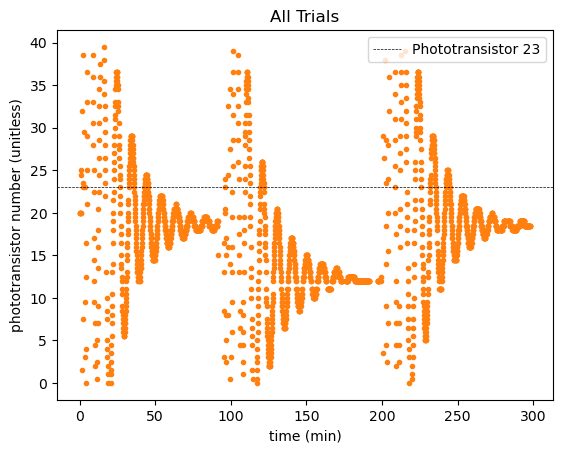

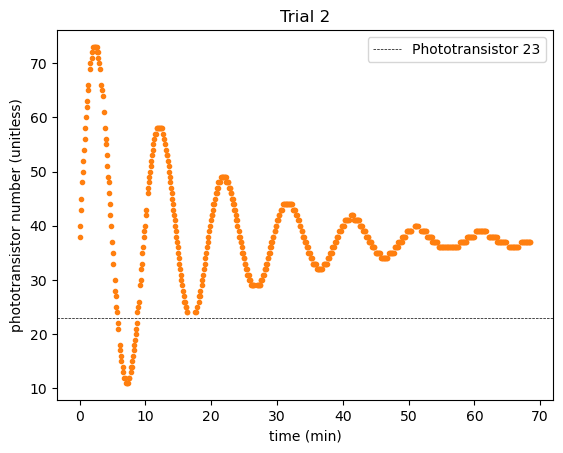

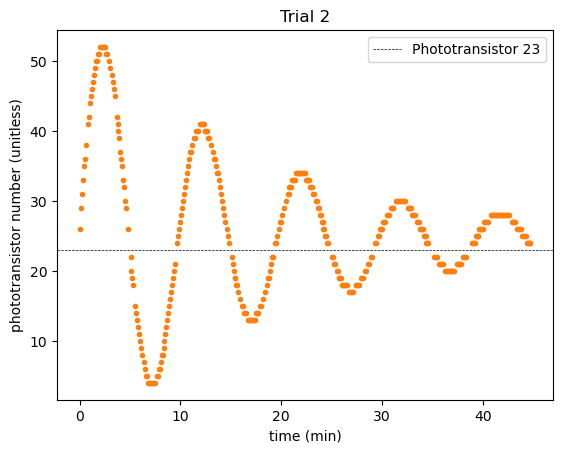

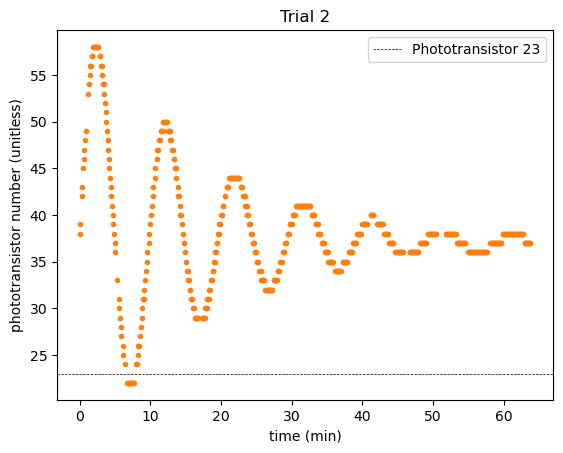

In [17]:
# Prints the data
for file in uts:
    plot_gc(uts, uys, file, name = "All Trials", save = False)

for file in ftp:
    plot_gc(ts, ys, file, name = "Trial 2", save = file == "3e_1-2-1")


	- 3e_1-1 -
A:	(3.5158731074028573 ± 0.10990073455986545) m
w0:	(0.44160412871965926 ± 0.0008245773100825682) radians
S:	(38.74140011255794 ± 0.040050521382075106) m
tau:	(-15946949.408060683 ± 204089656298.11606) s
phi:	(82.90008196994634 ± 0.033538386148515224) radians
Overparameterised? 2.6289873297217165e+29 :  [1.20781715e-02 6.79927740e-07 1.60404426e-03 4.16525878e+22
 1.12482335e-03]


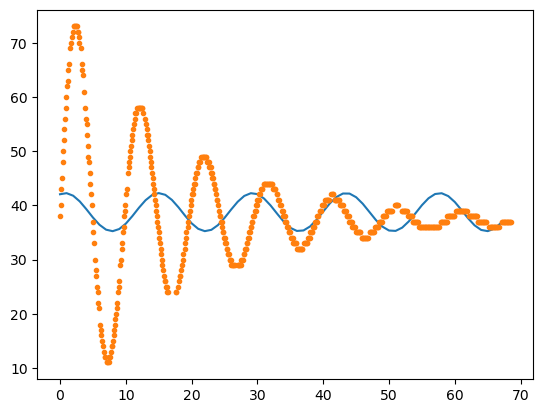


	- 3e_1-2-1 -
A:	(11.910550348303445 ± 0.10891332891122119) m
w0:	(0.6373311837248634 ± 0.00045159201402218804) radians
S:	(24.99476055691488 ± 0.050661445357938026) m
tau:	(-1099282291.3866775 ± 221703881266260.1) s
phi:	(56.6446149152752 ± 0.011793519873443405) radians
Overparameterised? 1.9960258046303129e+37 :  [1.18621132e-02 2.03935347e-07 2.56658205e-03 4.91526110e+28
 1.39087111e-04]


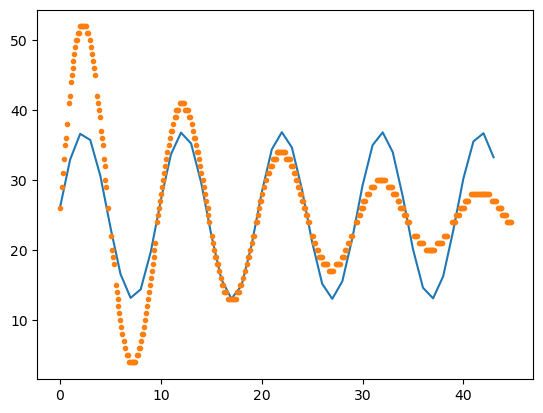


	- 3e_1-2-2 -
A:	(6.637953921884748 ± 0.11893957335021166) m
w0:	(0.6444095107971725 ± 0.0004715607440082505) radians
S:	(37.782982375919985 ± 0.04218680189898489) m
tau:	(-16627544.947930766 ± 136277738845.39511) s
phi:	(100.52460355463643 ± 0.01764797582814618) radians
Overparameterised? 3.387724718100738e+29 :  [1.41466221e-02 2.22369535e-07 1.77972625e-03 1.85716221e+22
 3.11451051e-04]


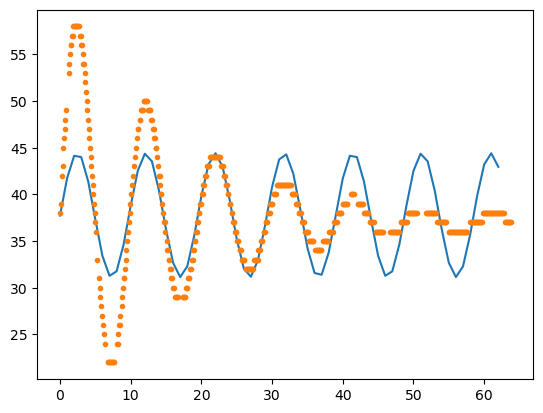

In [154]:
# Contains our guesses for paramters

# Guess parameters

gp = {
    # File name  A,              w,              S,             tau,  phi
    
    # Previous data (currently unused)
#    "1":        (20 * 5 / 1000, 2 * np.pi / 570, 17 * 5 / 1000, 1000, -np.pi / 4),
#    "2_3-1":    (25 * 5 / 1000, 2 * np.pi / 650, 24 * 5 / 1000, 1000, -np.pi / 6),
#    "2_3-2":    (18 * 5 / 1000, 2 * np.pi / 650, 13 * 5 / 1000, 1200, -np.pi / 6),
    
    # No phi data
#    "3e_1-1":   (0.22,          0.01,            0.19,          1200),
#    "3e_1-2-1": (0.17,          0.01,            0.12,          1200),
#    "3e_1-2-2": (0.17,          0.01,            0.19,          1200)
    
    
    # Current data (with phi)
    "3e_1-1":   (0.22,          0.01,            0.19,          1200, 0),
    "3e_1-2-1": (0.17,          0.01,            0.12,          1200, 0),
    "3e_1-2-2": (0.17,          0.01,            0.19,          1200, 0)
}

# Converts guesses to correct units
#for guess in gp:
#    gp[guess] = (gp[guess][0] * 5 / 1000, 
#                 2 * np.pi / gp[guess][1], 
#                 gp[guess][2] * 5 /1000, 
#                 gp[guess][3], 
#                 gp[guess][4])

a_fits = {}
covs = {}
uncs = {}

for guess in gp:
    
    # Performs the non-linear fit
    a_fits[guess], covs[guess] = curve_fit(grav_osc, ts[guess], ys[guess], p0 = gp[guess], absolute_sigma = True)
        

    # Obtains the uncertainties
    # ∂x_i = sqrt(covariance[i, i])
    uncs[guess] = [np.sqrt(covs[guess][i][i]) for i in range(len(covs[guess]))]

    # Prints our variables
    print("\n\t-", guess, "-")
    print("A:\t(", a_fits[guess][0], " ± ", uncs[guess][0], ") m", sep="")
    print("w0:\t(", a_fits[guess][1], " ± ", uncs[guess][1], ") radians", sep="")
    print("S:\t(", a_fits[guess][2], " ± ", uncs[guess][2], ") m", sep="")
    print("tau:\t(", a_fits[guess][3], " ± ", uncs[guess][3], ") s", sep="")
    print("phi:\t(", a_fits[guess][4], " ± ", uncs[guess][4], ") radians", sep="")
    print("Overparameterised?", np.linalg.cond(covs[guess]), ": ", np.diag(covs[guess]))
    
    ft = [i for i in range(int(ts[guess][-1]))]
    plt.plot(ft, [grav_osc(i, a_fits[guess][0], a_fits[guess][1], a_fits[guess][2], a_fits[guess][3], a_fits[guess][4]) for i in ft])
    plt.plot(ts[guess], ys[guess], marker = "o", markersize = 3, linestyle = "None")
    
    plt.show()


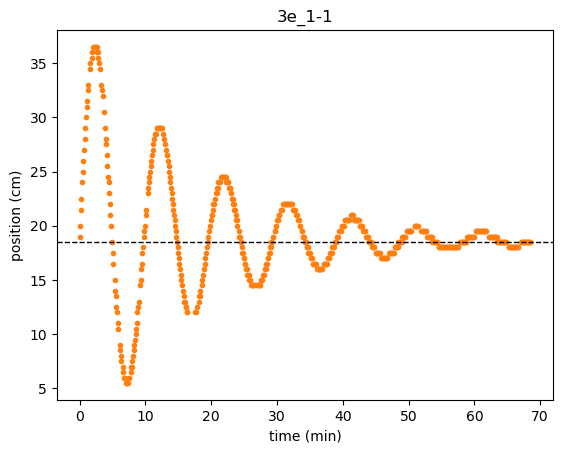

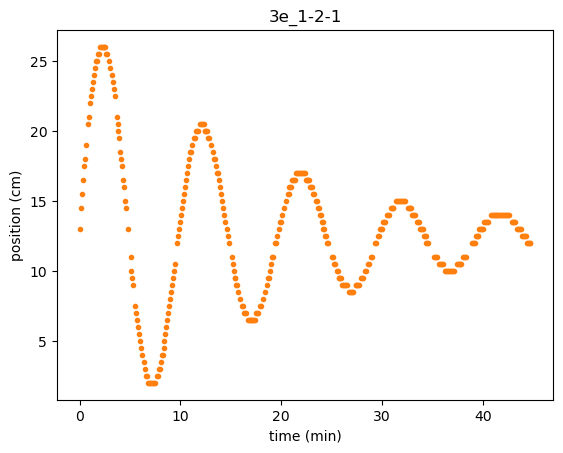

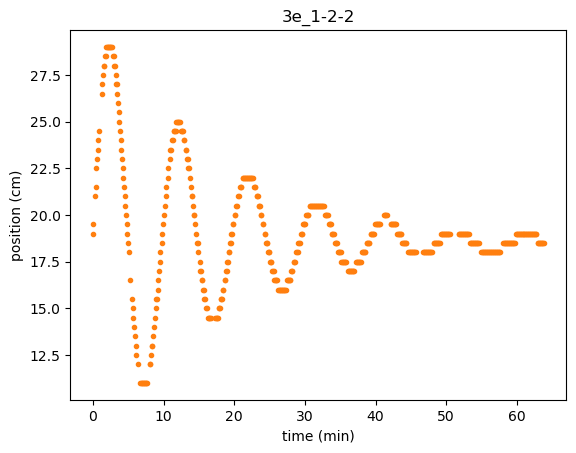

In [120]:
# Performs a special fit just to find a better value for ∆S

ts_S = {}
ys_S = {}

'''
w_norms = {
    "3e_1-1": a_fits_op["3e_1-1"][0],
    "3e_1-2-1": a_fits_op["3e_1-2-1"][0],
    "3e_1-2-2": a_fits_op["3e_1-2-2"][0]
}

tau_norms = {
    "3e_1-1": a_fits_op["3e_1-1"][1],
    "3e_1-2-1": a_fits_op["3e_1-2-1"][1],
    "3e_1-2-2": a_fits_op["3e_1-2-2"][1]
}
'''

ys_S = copy.deepcopy(ys)
ts_S = copy.deepcopy(ts)

'''
# Fixes our data for overparameterization
for file in ftp:
    
    # Removes offset, S, and amplitude, A
    y0 = ys_op[file][-1]
    for i in range(len(ys_op[file])):
        ys_S[file][i] /= norms[file]
        #ts_S[file][i] *= w_norms[file]
'''

for file in ys_S:
    plot_gc(ts_S, ys_S, file)


	- 3e_1-1 -
S:	(18.784080228010463 ± 0.008518908280478368) m
w0:	(0.6425296573250285 ± 0.0001291424048396905) radians
Tau:	(17.752221104057984 ± 0.061481301581719806) unitless
A:	(20.190761906038645 ± 0.049471450562694204) m
Overparameterised? 322949.1656003814 :  [7.25717983e-05 1.66777607e-08 3.77995044e-03 2.44742442e-03]


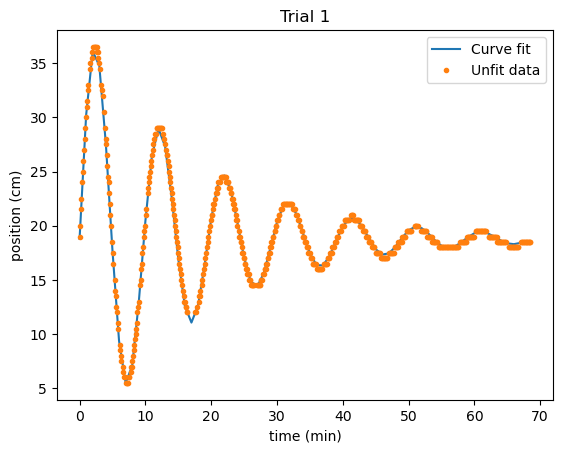


	- 3e_1-2-1 -
S:	(12.368980774528062 ± 0.01105853072203572) m
w0:	(0.6411480498504862 ± 0.00018682136047189468) radians
Tau:	(18.202426073243043 ± 0.08861913358278992) unitless
A:	(15.611359920856167 ± 0.049756555973434924) m
Overparameterised? 269177.01273175783 :  [1.22291102e-04 3.49022207e-08 7.85335084e-03 2.47571486e-03]


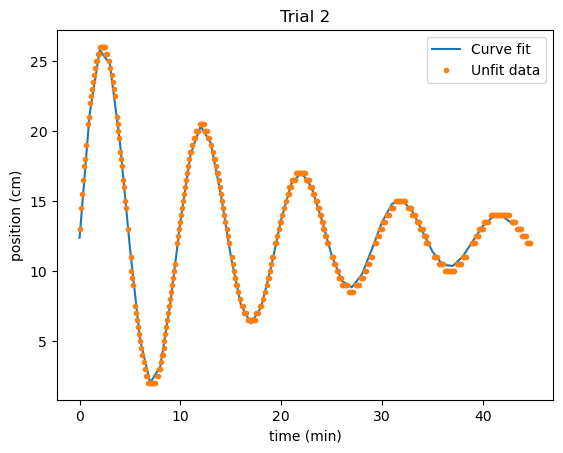


	- 3e_1-2-2 -
S:	(18.67227776888639 ± 0.006876394544805919) m
w0:	(0.6423802983993118 ± 0.00017149618086605663) radians
Tau:	(17.768094196279197 ± 0.0795764635553826) unitless
A:	(11.950071795115225 ± 0.037221415245794406) m
Overparameterised? 242307.56274267467 :  [4.72848019e-05 2.94109401e-08 6.33241355e-03 1.38543375e-03]


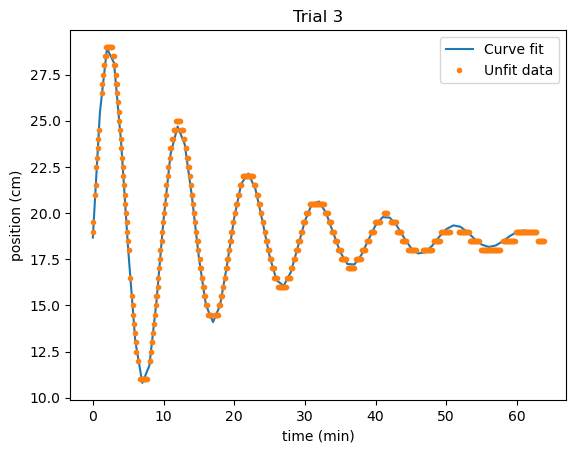

In [148]:
# One more specialised fit to get a good value for ∆S
# I'm doing this to hopefully get a better error on our ∆S value;
# at the moment, the ∂∆S term dominates the error


# Guess parameters
gp_S = {
    # File name  S,   w_0,  tau
    "3e_1-1":   (1.6, 0.01, 1000, 0.22),
    "3e_1-2-1": (1.2, 0.01, 1000, 0.22),
    "3e_1-2-2": (1.6, 0.01, 1000, 0.22)
}

gp_S = {
    # File name  S,   w_0,  tau
    "3e_1-1":   (1.6 * 100, 0.01 * 60, 1000 / 60, 0.22 * 100),
    "3e_1-2-1": (1.2 * 100, 0.01 * 60, 1000 / 60, 0.22 * 100),
    "3e_1-2-2": (1.6 * 100, 0.01 * 60, 1000 / 60, 0.22 * 100)
}


a_fits_S = {}
covs_S = {}
uncs_S = {}

save = True
z = 0

for guess in gp_S:
    z += 1
    
    # Performs the non-linear fit
    a_fits_S[guess], covs_S[guess] = curve_fit(grav_osc_S, ts_S[guess], ys_S[guess], p0 = gp_S[guess])

    # Obtains the uncertainties
    # ∂x_i = sqrt(covariance[i, i])
    uncs_S[guess] = [np.sqrt(covs_S[guess][i][i]) for i in range(len(covs_S[guess]))]

    # Prints our variables
    print("\n\t-", guess, "-")
    print("S:\t(", a_fits_S[guess][0], " ± ", uncs_S[guess][0], ") m", sep="")
    print("w0:\t(", a_fits_S[guess][1], " ± ", uncs_S[guess][1], ") radians", sep="")
    print("Tau:\t(", a_fits_S[guess][2], " ± ", uncs_S[guess][2], ") unitless", sep="")
    print("A:\t(", a_fits_S[guess][3], " ± ", uncs_S[guess][3], ") m", sep="")
    print("Overparameterised?", np.linalg.cond(covs_S[guess]), ": ", np.diag(covs_S[guess]))
    
    ft = [i for i in range(int(ts_S[guess][-1]))]

    fig, ax = plt.subplots()
    
    ax.plot(ft, [grav_osc_S(i, a_fits_S[guess][0], a_fits_S[guess][1], a_fits_S[guess][2], a_fits_S[guess][3]) for i in ft], label = "Curve fit")
    ax.plot(ts_S[guess], ys_S[guess], marker = "o", markersize = 3, linestyle = "None", label = "Unfit data")
    
    # Add a legend
    ax.legend()
    
    # Adds titles
    ax.set_title("Trial " + str(z))
    plt.ylabel("position (cm)")
    plt.xlabel("time (min)")
    
    if save:
        plt.savefig("Trial " + str(z) + '.png', bbox_inches='tight')
        
    plt.show()


In [122]:
# Static variables that "we" measured
b_0 = 46.5 / 1000 # m
M = 1500 / 1000 # kg
d = 49.9 / 1000 # m
L = 242.5 / 100 # m; note, this one was measured in cm. It was the only 
r = 7.56 / 1000 # m

# Uncertainties; same units as repsective above
db_0 = 0.1 / 1000
dM = 1 / 1000
dd = 0.05 / 1000
#dL = 5 / 100
dL = 0.5 / 100
dr = 0.05 / 1000

In [123]:
# Calculated variables

# Average change in S
# Between all differences of position 1 and 2
dS = (a_fits_S["3e_1-1"][0] - a_fits_S["3e_1-2-1"][0] + a_fits_S["3e_1-2-2"][0] - a_fits_S["3e_1-2-1"][0]) / 2

# Average angular frequency
w_1 = 0
tau = 0
for fit in a_fits_S:
    w_1 += a_fits_S[fit][1]
    tau += a_fits_S[fit][2]
w_1 /= len(a_fits_S)
tau /= len(a_fits_S)

print(dS, w_1, tau)

9.018752968408714 -0.0997599904865562 31419708.618536156


In [124]:
# Calculates uncertainties

# Uncertainties
ddS = (2 * uncs_S["3e_1-2-1"][0] + uncs_S["3e_1-1"][0] + uncs_S["3e_1-2-2"][0]) / np.sqrt(2) # Propogation of eror

# Gets the uncertainties of angular frequency and decay
# Uses geometric mean
# ∂y = sqrt(∂x_i ** 2 + ...) / (n - 1)
dw_1 = 0
dtau = 0
for fit in a_fits_S:
    dw_1 += uncs_S[fit][1] ** 2
    dtau += uncs_S[fit][2] ** 2
dw_1 = np.sqrt(dw_1) / (len(a_fits_S) - 1)
dtau = np.sqrt(dtau) / (len(a_fits_S) - 1)

# These are the terms in the error propogation: ∆x * ∂f/∂x
pS   = ddS * b_0 ** 2 / 4 / M / d / L * lam(d, r) * eps(w_1, tau)
pb_0 = db_0 * dS * b_0 / 2 / M / d / L * lam(d, r) * eps(w_1, tau)
pM   = dM * dS * b_0 ** 2 / 4 / M ** 2 / d / L * lam(d, r) * eps(w_1, tau)
pL   = dL * dS * b_0 ** 2 / 4 / M / d / L ** 2 * lam(d, r) * eps(w_1, tau)
pr   = dr * 4 / 5 * r * ada(dS, b_0, M, d, L) * eps(w_1, tau)
pw_1 = dw_1 * 2 * w_1 * ada(dS, b_0, M, d, L) * lam(d, r)
ptau = dtau * 2 / tau ** 3 * ada(dS, b_0, M, d, L) * lam(d, r)
pd   = dd * dS * b_0 ** 2 / 20 / L / M / tau ** 2 / d ** 2 * (tau ** 2 * w_1 + 1) * (5 * d ** 2 - 2 * r ** 2)

print("dS:", dS, "±", ddS)
print("w_1:", w_1, "±", dw_1)
print("tau:", tau, "±", dtau)

dS: 9.018752968408714 ± 1.2170295499953192
w_1: -0.0997599904865562 ± 0.017162807636918635
tau: 31419708.618536156 ± 393221022193868.0


In [125]:
# Final calculations
G = (dS * b_0 ** 2) / (4 * M * d * L) * (d ** 2 + 2 / 5 * r ** 2) * (w_1 ** 2 + 1 / (tau ** 2))

# ∆f = sqrt((∆x_1 * ∂f/∂x_1)^2 + ...)
dG = np.sqrt(pS ** 2 + pb_0 ** 2 + pM ** 2 + pL ** 2 + pr ** 2 + pw_1 ** 2 + ptau ** 2 + pd ** 2)

print(G, "±", dG, "m^3 kg^-1 s^-2")
print(G, " (1 ± ", dG / G, ") m^3 kg^-1 s^-2", sep="")

trueG = 6.6743e-11

#print(trueG - G, "absolute difference, or", (trueG - G) / trueG, "relative difference")

if G - dG < trueG and G + dG > trueG:
    print("The value IS within uncertainty of", trueG)
else:
    print("The value is NOT within uncertainty of", trueG)

# G = 6.6743 × 10-11 m3 kg-1 s-2

6.716947080495465e-07 ± 2.4836628697235986e-07 m^3 kg^-1 s^-2
6.716947080495465e-07 (1 ± 0.3697606725137985) m^3 kg^-1 s^-2
The value is NOT within uncertainty of 6.6743e-11
